In [ ]:
#שאלת המחקר שלנו
#איך אפשר לשפר ולמקסם את חווית הקניה של הלקוח בעזרת מערכת המלצות מוצרים(על פי קניות בעבר של חברות דומות).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
#יש נתונים על כל שנה 
sales2018 = '/content/drive/MyDrive/ניקוי דאטה -  פרויקט גמר/מכירות 2018.csv'
sales2019 = '/content/drive/MyDrive/ניקוי דאטה -  פרויקט גמר/מכירות 2019.csv'
sales2020 = '/content/drive/MyDrive/ניקוי דאטה -  פרויקט גמר/מכירות 2020.csv'
sales2021 = '/content/drive/MyDrive/ניקוי דאטה -  פרויקט גמר/מכירות 2021.csv'
LocatingAccounts = '/content/drive/MyDrive/ניקוי דאטה -  פרויקט גמר/איתור חשבונות 25.11.2021.1637.csv'


sales2018_df = pd.read_csv(sales2018)
sales2019_df = pd.read_csv(sales2019)
sales2020_df = pd.read_csv(sales2020)
sales2021_df = pd.read_csv(sales2021)

LocatingAccounts_df = pd.read_csv(LocatingAccounts)

In [ ]:
LocatingAccounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   קוד חשבון    77 non-null     float64
 1   סעיף מאזני   77 non-null     object 
 2   שם חשבון     77 non-null     object 
 3   מטבע         77 non-null     object 
 4   תאריך יצירה  77 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


In [ ]:
sales2018_df.head()

,קוד פריט,מספר מסמך,פרופיל,תאריך אסמכתא,קוד לקוח,שם לקוח,מיקוד,שם לקוח.1,סיווג לקוח,אסמכתא חיצונית,...,%הנחה כללי,הנחה בשורה,"סה""כ לשורה בש""ח",תאריך אספקה,שם חברה,סוכן,docStatus,קוד קבוצת פריט,תאור קבוצת פריט,מסד
0,GLG-3313-23010001-25L,FIN.11/013824,חשבונית מס כולל מלאי,16/04/2018,2912001,"פ.מ.ס מיגון בע""מ",61180,"פ.מ.ס מיגון בע""מ",יצרן ציוד ומיכון,9204-18,...,0.0,0,720.0,15/04/2018,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,0,NaN,NaN,103
1,GLG-3313-42310001-750ML,FIN.11/014994,חשבונית מס כולל מלאי,23/05/2018,5140953,לפלנד מערכות,6473104,גרין איט,סוחר,23/05/2018,...,0.0,0,120.0,23/05/2018,"רוטל דבקים וכימיקלים בע""מ",NaN,0,NaN,NaN,107
2,RGN-3313-5L,FIN.11/015761,חשבונית מס כולל מלאי,14/06/2018,5140953,גרין איט,6473104,גרין איט,סוחר,14/06/2018,...,0.0,0,172.0,14/06/2018,"רוטל דבקים וכימיקלים בע""מ",NaN,0,NaN,NaN,682
3,RGN-3313-1L,FIN.11/016837,חשבונית מס כולל מלאי,19/07/2018,5041949,"בס""ד בריאות מהטבע",4959127,"בס""ד בריאות מהטבע",סוחר,18/07/2018,...,0.0,0,168.0,18/07/2018,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,0,NaN,NaN,681
4,GLG-3313-42310001-750ML,FIN.11/017123,חשבונית מס כולל מלאי,30/07/2018,5140953,גרין איט,6473104,גרין איט,סוחר,29/07/2018,...,0.0,0,120.0,29/07/2018,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,0,NaN,NaN,108


In [ ]:
sales2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   קוד פריט           1227 non-null   object 
 1   מספר מסמך          1227 non-null   object 
 2   פרופיל             1227 non-null   object 
 3   תאריך אסמכתא       1227 non-null   object 
 4   קוד לקוח           1227 non-null   int64  
 5   שם לקוח            1227 non-null   object 
 6   מיקוד              869 non-null    object 
 7   שם לקוח.1          1227 non-null   object 
 8   סיווג לקוח         1227 non-null   object 
 9   אסמכתא חיצונית     1224 non-null   object 
 10  תאור פריט          1227 non-null   object 
 11  מאפיין פריט        1227 non-null   object 
 12  הפרדת מוצרים       1227 non-null   object 
 13  מקט לקוח           183 non-null    object 
 14  כמות               1227 non-null   int64  
 15  מחיר נטו לשורה     1227 non-null   float64
 16  קוד מטבע           1227 

In [ ]:
sales2021_df.shape

(1227, 28)

In [ ]:
#שינוי כותרות לאנגלית 
sales2018_df.columns = ['ItemCode', 'DocNumber', 'Profile','DateReference' ,'CustomerCode', 'CustomerName','PostalCode', 'CustomerName1', 'CustomerClassification', 'ExternalReference', 'ItemName','ProductDescription' , 'ProductSeperation',
                        'CustomerCatalogueNum', 'Amount', 'NetPricePerLine', 'CoinCode', 'ShekelPrice', 'RowDiscount', 'GeneralDiscount','DiscountInRow','TotalPerLine', 'SupplyDate', 'CompanyName','Agent','docStatus','ItemGroupCode','ItemGroupDescription','Index']
sales2019_df.columns = ['ItemCode', 'DocNumber', 'Profile','DateReference' ,'CustomerCode', 'CustomerName','PostalCode', 'CustomerName1', 'CustomerClassification', 'ExternalReference',  'ItemName','ProductDescription' , 'ProductSeperation',
                        'CustomerCatalogueNum', 'Amount', 'NetPricePerLine', 'CoinCode', 'ShekelPrice', 'RowDiscount', 'GeneralDiscount','DiscountInRow','TotalPerLine', 'SupplyDate', 'CompanyName','Agent','docStatus','ItemGroupCode','ItemGroupDescription','Index']
sales2020_df.columns = ['ItemCode', 'DocNumber', 'Profile','DateReference' ,'CustomerCode', 'CustomerName','PostalCode', 'CustomerName1', 'CustomerClassification', 'ExternalReference',  'ItemName','ProductDescription' , 'ProductSeperation',
                        'CustomerCatalogueNum', 'Amount', 'NetPricePerLine', 'CoinCode', 'ShekelPrice', 'RowDiscount', 'GeneralDiscount','DiscountInRow','TotalPerLine', 'SupplyDate', 'CompanyName','Agent','docStatus','ItemGroupCode','ItemGroupDescription']
sales2021_df.columns = ['ItemCode', 'DocNumber', 'Profile','DateReference' ,'CustomerCode', 'CustomerName','PostalCode', 'CustomerName1', 'CustomerClassification', 'ExternalReference', 'ItemName','ProductDescription' , 'ProductSeperation',
                        'CustomerCatalogueNum', 'Amount', 'NetPricePerLine', 'CoinCode', 'ShekelPrice', 'RowDiscount', 'GeneralDiscount','DiscountInRow','TotalPerLine', 'SupplyDate', 'CompanyName','Agent','docStatus','ItemGroupCode','ItemGroupDescription']
LocatingAccounts_df.columns = ['AccountCode','BalanceSheetItem','AccountName','Currency','CreationDate']

In [ ]:
#הוספת שנה לכל טבלה
sales2018_df['Year'] = '2018'
sales2019_df['Year'] = '2019'
sales2020_df['Year'] = '2020'
sales2021_df['Year'] = '2021'

#חיבור טבלאות 
AllSales_df = pd.concat([sales2018_df, sales2019_df,sales2020_df,sales2021_df])
AllSales_df.reset_index(inplace=True)
AllSales_df

,index,ItemCode,DocNumber,Profile,DateReference,CustomerCode,CustomerName,PostalCode,CustomerName1,CustomerClassification,...,DiscountInRow,TotalPerLine,SupplyDate,CompanyName,Agent,docStatus,ItemGroupCode,ItemGroupDescription,Index,Year
0,0,GLG-3313-23010001-25L,FIN.11/013824,חשבונית מס כולל מלאי,16/04/2018,2912001,"פ.מ.ס מיגון בע""מ",61180,"פ.מ.ס מיגון בע""מ",יצרן ציוד ומיכון,...,0.0,720.00,15/04/2018,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,0,NaN,NaN,103.0,2018
1,1,GLG-3313-42310001-750ML,FIN.11/014994,חשבונית מס כולל מלאי,23/05/2018,5140953,לפלנד מערכות,6473104,גרין איט,סוחר,...,0.0,120.00,23/05/2018,"רוטל דבקים וכימיקלים בע""מ",NaN,0,NaN,NaN,107.0,2018
2,2,RGN-3313-5L,FIN.11/015761,חשבונית מס כולל מלאי,14/06/2018,5140953,גרין איט,6473104,גרין איט,סוחר,...,0.0,172.00,14/06/2018,"רוטל דבקים וכימיקלים בע""מ",NaN,0,NaN,NaN,682.0,2018
3,3,RGN-3313-1L,FIN.11/016837,חשבונית מס כולל מלאי,19/07/2018,5041949,"בס""ד בריאות מהטבע",4959127,"בס""ד בריאות מהטבע",סוחר,...,0.0,168.00,18/07/2018,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,0,NaN,NaN,681.0,2018
4,4,GLG-3313-42310001-750ML,FIN.11/017123,חשבונית מס כולל מלאי,30/07/2018,5140953,גרין איט,6473104,גרין איט,סוחר,...,0.0,120.00,29/07/2018,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,0,NaN,NaN,108.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,1222,GLG-6818-23010000-25L,11.051.21000003,חשבונית יצוא,14/03/2021,5051572,Radiex,0,Radiex,שונות,...,0.0,33.16,15/03/2021,גרין ליין גלובל,רוטל,0,2042.0,חמרי ניקוי,NaN,2021
4753,1223,GLG-6818-23010000-25L,10GG52.2100010,חשבונית מס כולל מלאי,19/04/2021,5051241,"הגינה בכליל בע""מ",2523300,"הגינה בכליל בע""מ",סוחר,...,34.0,299.00,12/04/2021,גרין ליין גלובל,גיא חן,3,2042.0,חמרי ניקוי,NaN,2021
4754,1224,GLG-6818-23010000-25L,10GG52.2100033,חשבונית מס כולל מלאי,10/10/2021,5051241,"הגינה בכליל בע""מ",2523300,"הגינה בכליל בע""מ",סוחר,...,34.0,299.00,16/08/2021,גרין ליין גלובל,גיא חן,3,2042.0,חמרי ניקוי,NaN,2021
4755,1225,GLG-6818-20100000-5L,10DVK52.2103606,חשבונית מס כולל מלאי,11/04/2021,5051479,"אגדת לחם בע""מ",NaN,"אגדת לחם בע""מ","תעשית המזון, הפארמה והקוסמטיקה",...,88.0,208.00,11/04/2021,"רוטל דבקים וכימיקלים בע""מ",ליאור בורוכוב,3,2042.0,חמרי ניקוי,NaN,2021


In [ ]:
AllSales_df.drop(['Profile','CustomerCode','CustomerCatalogueNum','CompanyName','DocNumber','CustomerName1','ExternalReference','ProductSeperation','NetPricePerLine','RowDiscount','DiscountInRow','TotalPerLine','Agent','docStatus','ItemGroupCode','ItemGroupDescription','Index'], axis=1 ,inplace= True)


In [ ]:
LocatingAccounts_df['InIsrael'] = 1
# להשאיר שם והאם בארץ
LocatingAccounts_df.drop(['AccountCode','BalanceSheetItem','Currency','CreationDate'],axis=1 ,inplace= True)
LocatingAccounts_df.head()

,AccountName,InIsrael
0,מלי בר שירה,1
1,צ'אנק פודס,1
2,"לס מעבדות ירוקות בע""מ",1
3,עץ השדה,1
4,קיטור הארץ,1


In [ ]:
AllSales_df = pd.merge(left=AllSales_df , right=LocatingAccounts_df , left_on='CustomerName', right_on='AccountName', how='left' )
AllSales_df.head()

,index,ItemCode,DateReference,CustomerName,PostalCode,CustomerClassification,ItemName,ProductDescription,Amount,CoinCode,ShekelPrice,GeneralDiscount,SupplyDate,Year,AccountName,InIsrael
0,0,GLG-3313-23010001-25L,16/04/2018,"פ.מ.ס מיגון בע""מ",61180,יצרן ציוד ומיכון,אקונומיקה אקולוגית,N,2,ILS,315.0,0.0,15/04/2018,2018,NaN,NaN
1,1,GLG-3313-42310001-750ML,23/05/2018,לפלנד מערכות,6473104,סוחר,אקונומיקה אקולוגית,N,12,ILS,14.0,0.0,23/05/2018,2018,NaN,NaN
2,2,RGN-3313-5L,14/06/2018,גרין איט,6473104,סוחר,אקונומיקה אקולוגית,N,4,ILS,67.0,0.0,14/06/2018,2018,NaN,NaN
3,3,RGN-3313-1L,19/07/2018,"בס""ד בריאות מהטבע",4959127,סוחר,אקונומיקה אקולוגית,N,12,ILS,14.0,0.0,18/07/2018,2018,NaN,NaN
4,4,GLG-3313-42310001-750ML,30/07/2018,גרין איט,6473104,סוחר,אקונומיקה אקולוגית,N,12,ILS,14.0,0.0,29/07/2018,2018,NaN,NaN


In [ ]:
AllSales_df.drop(['AccountName'], axis=1 ,inplace= True)


In [ ]:
AllSales_df.InIsrael.isnull().sum()



4420

In [ ]:
AllSales_df['InIsrael'].fillna(value = 0, inplace = True)

In [ ]:
set(AllSales_df.InIsrael)

{0.0, 1.0}

In [ ]:
AllSales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4757 entries, 0 to 4756
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   4757 non-null   int64  
 1   ItemCode                4757 non-null   object 
 2   DateReference           4757 non-null   object 
 3   CustomerName            4757 non-null   object 
 4   PostalCode              3220 non-null   object 
 5   CustomerClassification  4755 non-null   object 
 6   ItemName                4757 non-null   object 
 7   ProductDescription      4757 non-null   object 
 8   Amount                  4757 non-null   int64  
 9   CoinCode                4756 non-null   object 
 10  ShekelPrice             4757 non-null   float64
 11  GeneralDiscount         4757 non-null   float64
 12  SupplyDate              4757 non-null   object 
 13  Year                    4757 non-null   object 
 14  InIsrael                4757 non-null   

In [ ]:
AllSales_df.shape

(4757, 15)

In [ ]:
AllSales_df.nunique()

index                     1564
ItemCode                   339
DateReference              803
CustomerName               972
PostalCode                  94
CustomerClassification      21
ItemName                   107
ProductDescription          32
Amount                     101
CoinCode                     2
ShekelPrice                283
GeneralDiscount              4
SupplyDate                 904
Year                         4
InIsrael                     2
dtype: int64

In [ ]:
AllSales_df.drop(['index','GeneralDiscount','CoinCode'],axis=1,inplace=True)

In [ ]:
#AllSales_df['Refund'] =  AllSales_df['Profile'].apply(lambda x: 1 if ((str(x) == 'חשבונית זיכוי' or str(x) == 'חשבונית זיכוי כספית')) else 0)
AllSales_df['Refund'] =  AllSales_df['Amount'].apply(lambda x: 1 if (((x) <= 0 )) else 0)
#AllSales_df.drop(['Profile'],axis=1,inplace=True)
AllSales_df[['Refund', 'Amount']]

,Refund,Amount
0,0,2
1,0,12
2,0,4
3,0,12
4,0,12
...,...,...
4752,0,1
4753,0,1
4754,0,1
4755,0,4


In [ ]:
#למספר
AllSales_df = AllSales_df.astype({'InIsrael':'int'})
AllSales_df = AllSales_df.astype({'PostalCode':'float'})
AllSales_df = AllSales_df.astype({'Year':'int'})
AllSales_df.DateReference = pd.to_datetime(AllSales_df.DateReference)
AllSales_df.SupplyDate = pd.to_datetime(AllSales_df.SupplyDate)# -לא נותן

AllSales_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4757 entries, 0 to 4756
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ItemCode                4757 non-null   object        
 1   DateReference           4757 non-null   datetime64[ns]
 2   CustomerName            4757 non-null   object        
 3   PostalCode              3220 non-null   float64       
 4   CustomerClassification  4755 non-null   object        
 5   ItemName                4757 non-null   object        
 6   ProductDescription      4757 non-null   object        
 7   Amount                  4757 non-null   int64         
 8   ShekelPrice             4757 non-null   float64       
 9   SupplyDate              4757 non-null   datetime64[ns]
 10  Year                    4757 non-null   int64         
 11  InIsrael                4757 non-null   int64         
 12  Refund                  4757 non-null   int64   

In [ ]:
#בדיקה אם יש שורות כפולות 
AllSales_df[AllSales_df.duplicated()]

,ItemCode,DateReference,CustomerName,PostalCode,CustomerClassification,ItemName,ProductDescription,Amount,ShekelPrice,SupplyDate,Year,InIsrael,Refund
73,GLG-6011-42310400-750ML,2018-05-14,"זהר צח 2009 אילת בע""מ",88000.0,סוחר,ממיס ומנקה שומנים תעשייתיים,N,120,24.0000,2018-04-17,2018,0,0
417,GLG-8612-20100000-5L,2018-01-21,"אש וואט שיווק בע""מ",NaN,סוחר,ממיס ומסיר דבק,N,1,414.0000,2018-01-21,2018,0,0
491,RGN-8510-1L,2018-10-24,מור חברה לשווק מוצרי בניי,4809148.0,סוחר,ממיס ומסיר צבע,N,10,85.0000,2018-10-23,2018,0,0
570,GLG-3317-20100000-5L,2018-05-06,מיכאל מדבדסקי,0.0,שונות,מסיר אבנית ללא הקצפה וריח,N,1,72.0000,2018-05-06,2018,0,0
828,RGN-6327-750_ML,2018-09-01,הום בוטיק,7871903.0,"תעשית המזון, הפארמה והקוסמטיקה",נוזל לניקוי,N,120,13.0000,2018-07-01,2018,0,0
908,GLG-7076-23010000-25L,2018-08-22,יו.טי.איי - פתרונות ניהול,NaN,סוחר,נוזל לניקוי,Industry,1,450.0000,2018-08-20,2018,0,0
1010,RGN-999,2019-05-20,גרין איט,6473104.0,סוחר,פקדון,25L,1,35.0000,2019-05-19,2019,0,0
1042,RGN-3312CG-750ML,2019-06-16,"זהר צח 2009 אילת בע""מ",88000.0,סוחר,ממיס ומסיר אבנית,Delicate scent,45,14.0000,2019-05-03,2019,0,0
1044,RGN-3312CG-750ML,2019-06-16,"זהר צח 2009 אילת בע""מ",88000.0,סוחר,ממיס ומסיר אבנית,Delicate scent,-45,14.0000,2019-05-03,2019,0,1
1313,GLG-6011-23010400-25L,2019-01-22,י.ד שרות קול,NaN,שירותים,ממיס ומנקה שומנים תעשייתיים,N,1,540.0000,2019-01-22,2019,0,0


In [ ]:
AllSales_df.drop_duplicates(inplace=True)
AllSales_df.reset_index(inplace = True, drop=True)
AllSales_df


,ItemCode,DateReference,CustomerName,PostalCode,CustomerClassification,ItemName,ProductDescription,Amount,ShekelPrice,SupplyDate,Year,InIsrael,Refund
0,GLG-3313-23010001-25L,2018-04-16,"פ.מ.ס מיגון בע""מ",61180.0,יצרן ציוד ומיכון,אקונומיקה אקולוגית,N,2,315.00,2018-04-15,2018,0,0
1,GLG-3313-42310001-750ML,2018-05-23,לפלנד מערכות,6473104.0,סוחר,אקונומיקה אקולוגית,N,12,14.00,2018-05-23,2018,0,0
2,RGN-3313-5L,2018-06-14,גרין איט,6473104.0,סוחר,אקונומיקה אקולוגית,N,4,67.00,2018-06-14,2018,0,0
3,RGN-3313-1L,2018-07-19,"בס""ד בריאות מהטבע",4959127.0,סוחר,אקונומיקה אקולוגית,N,12,14.00,2018-07-18,2018,0,0
4,GLG-3313-42310001-750ML,2018-07-30,גרין איט,6473104.0,סוחר,אקונומיקה אקולוגית,N,12,14.00,2018-07-29,2018,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,GLG-6818-23010000-25L,2021-03-14,Radiex,0.0,שונות,תרכיז ניקוי רב תכליתי,25L,1,33.16,2021-03-15,2021,0,0
4719,GLG-6818-23010000-25L,2021-04-19,"הגינה בכליל בע""מ",2523300.0,סוחר,תרכיז ניקוי רב תכליתי,25L,1,333.00,2021-12-04,2021,1,0
4720,GLG-6818-23010000-25L,2021-10-10,"הגינה בכליל בע""מ",2523300.0,סוחר,תרכיז ניקוי רב תכליתי,25L,1,333.00,2021-08-16,2021,1,0
4721,GLG-6818-20100000-5L,2021-11-04,"אגדת לחם בע""מ",NaN,"תעשית המזון, הפארמה והקוסמטיקה",תרכיז ניקוי רב תכליתי,5L,4,74.00,2021-11-04,2021,0,0


In [ ]:
AllSales_df.isnull().sum()

ItemCode                     0
DateReference                0
CustomerName                 0
PostalCode                1529
CustomerClassification       2
ItemName                     0
ProductDescription           0
Amount                       0
ShekelPrice                  0
SupplyDate                   0
Year                         0
InIsrael                     0
Refund                       0
dtype: int64

In [ ]:
AllSales_df['PostalCode'] = AllSales_df['PostalCode'].replace(0, np.nan)
AllSales_df['PostalCode'].fillna(value = np.random.randint(1000000,9999999) , inplace = True)
AllSales_df.dropna( inplace=True)

In [ ]:
AllSales_df.isnull().sum()

ItemCode                  0
DateReference             0
CustomerName              0
PostalCode                0
CustomerClassification    0
ItemName                  0
ProductDescription        0
Amount                    0
ShekelPrice               0
SupplyDate                0
Year                      0
InIsrael                  0
Refund                    0
dtype: int64

In [ ]:
#הוספת משתנה - גודל החברה 
Size_Customer = AllSales_df.groupby(by= 'CustomerName' ).sum()
Size_Customer = Size_Customer[['Amount']].reset_index()
Size_Customer =  Size_Customer[Size_Customer['Amount'] > 0]
Size_Customer

,CustomerName,Amount
0,Andredi Ricardo Cordero Carrión,6
1,Andrzej Kubica,16
2,Aztech Technologies Pte Ltd,12
3,Distribuidora Ojel s.a,61
4,Ella Rozanov,5
...,...,...
965,"תרביות רה""ן (1998) בע""מ",2
966,"תרו תעשית רוקחות בע""מ",3
967,"תרו-תעשיה רוקחית בע""מ",2
968,"תשלובת קירשנבאום בע""מ",1


In [ ]:
bins = [0,20,100,17173]
labels = [1, 2,3 ]
Size_Customer['Amount'] = pd.cut(x=Size_Customer.Amount, bins=bins, labels=labels)
#בדיקה אם לראות את סכום גודל החברות 
x = Size_Customer.groupby(by= 'Amount' ).count()
x

,CustomerName
Amount,
1,779
2,98
3,64


In [ ]:
Size_Customer.rename(columns = {'Amount':'Company_Size'}, inplace = True)
Size_Customer

,CustomerName,Company_Size
0,Andredi Ricardo Cordero Carrión,1
1,Andrzej Kubica,1
2,Aztech Technologies Pte Ltd,1
3,Distribuidora Ojel s.a,2
4,Ella Rozanov,1
...,...,...
965,"תרביות רה""ן (1998) בע""מ",1
966,"תרו תעשית רוקחות בע""מ",1
967,"תרו-תעשיה רוקחית בע""מ",1
968,"תשלובת קירשנבאום בע""מ",1


In [ ]:
AllSales_df.shape

(4721, 13)

In [ ]:
AllSales_df = pd.merge(left=AllSales_df , right=Size_Customer , left_on='CustomerName', right_on='CustomerName', how='inner' )
AllSales_df

,ItemCode,DateReference,CustomerName,PostalCode,CustomerClassification,ItemName,ProductDescription,Amount,ShekelPrice,SupplyDate,Year,InIsrael,Refund,Company_Size
0,GLG-3313-23010001-25L,2018-04-16,"פ.מ.ס מיגון בע""מ",61180.0,יצרן ציוד ומיכון,אקונומיקה אקולוגית,N,2,315.0,2018-04-15,2018,0,0,2
1,GLG-6011-23010400-25L,2018-11-06,"פ.מ.ס מיגון בע""מ",61180.0,יצרן ציוד ומיכון,ממיס ומנקה שומנים תעשייתיים,N,1,540.0,2018-10-06,2018,0,0,2
2,GLG-6011-23010400-25L,2018-12-09,"פ.מ.ס מיגון בע""מ",61180.0,יצרן ציוד ומיכון,ממיס ומנקה שומנים תעשייתיים,N,2,540.0,2018-04-09,2018,0,0,2
3,GLG-3317-23010000-25L,2018-04-16,"פ.מ.ס מיגון בע""מ",61180.0,יצרן ציוד ומיכון,מסיר אבנית ללא הקצפה וריח,N,2,338.0,2018-04-15,2018,0,0,2
4,GLG-3317-23010000-25L,2018-11-06,"פ.מ.ס מיגון בע""מ",61180.0,יצרן ציוד ומיכון,מסיר אבנית ללא הקצפה וריח,N,1,338.0,2018-10-06,2018,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,GLG-N-6011-99000400-KIT,2021-04-25,המחדש,9706141.0,שונות,מסיר שומנים מרוכז,100KG,2,846.0,2021-04-22,2021,0,0,1
4546,GLG-N-6324-99000002-KIT,2021-04-25,המחדש,9706141.0,שונות,נוזל לניקוי והסרת כתמים מבדים,100KG,2,554.0,2021-04-22,2021,0,0,1
4547,GLG-DEPOSIT-25L,2021-01-25,אוניברסיטת תל אביב,9706141.0,שירותים,פקדון,25L,1,35.0,2021-01-25,2021,0,0,1
4548,GLG-6818-23010000-25L,2021-01-25,אוניברסיטת תל אביב,9706141.0,שירותים,תרכיז ניקוי רב תכליתי,25L,1,333.0,2021-01-25,2021,0,0,1


In [ ]:
AllSales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 0 to 4549
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ItemCode                4550 non-null   object        
 1   DateReference           4550 non-null   datetime64[ns]
 2   CustomerName            4550 non-null   object        
 3   PostalCode              4550 non-null   float64       
 4   CustomerClassification  4550 non-null   object        
 5   ItemName                4550 non-null   object        
 6   ProductDescription      4550 non-null   object        
 7   Amount                  4550 non-null   int64         
 8   ShekelPrice             4550 non-null   float64       
 9   SupplyDate              4550 non-null   datetime64[ns]
 10  Year                    4550 non-null   int64         
 11  InIsrael                4550 non-null   int64         
 12  Refund                  4550 non-null   int64   

In [ ]:
AllSales_df.describe()

,PostalCode,Amount,ShekelPrice,Year,InIsrael,Refund
count,4.550000e+03,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000
mean,7.251593e+06,16.385055,353.137975,2019.616044,0.073187,0.022637
std,3.193193e+06,159.363273,1151.328681,1.087331,0.260472,0.148761
min,3.122000e+03,-72.000000,0.000000,2018.000000,0.000000,0.000000
25%,4.939037e+06,1.000000,24.000000,2019.000000,0.000000,0.000000
50%,9.706141e+06,2.000000,85.000000,2020.000000,0.000000,0.000000
75%,9.706141e+06,8.000000,344.000000,2021.000000,0.000000,0.000000
max,9.706141e+06,10000.000000,16800.000000,2021.000000,1.000000,1.000000


In [ ]:
corr_df = AllSales_df.corr()
corr_df


,PostalCode,Amount,ShekelPrice,Year,InIsrael,Refund
PostalCode,1.000000,-0.081220,-0.022698,0.118386,0.074888,0.000879
Amount,-0.081220,1.000000,-0.026442,0.006882,-0.016069,-0.022557
ShekelPrice,-0.022698,-0.026442,1.000000,-0.058543,0.161196,0.017568
Year,0.118386,0.006882,-0.058543,1.000000,0.016965,0.091800
InIsrael,0.074888,-0.016069,0.161196,0.016965,1.000000,0.030986
Refund,0.000879,-0.022557,0.017568,0.091800,0.030986,1.000000


In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=corr_df,
                   x=corr_df.index,
                   y=corr_df.index,
                   hoverongaps = False))
fig.show()

In [ ]:
for i in range(len(corr_df.columns)-1):
  print(corr_df.columns[i], 'is correlated to: ')
  for j in range(len(corr_df.columns)-1):
    if abs(corr_df.iloc[i,j])>=0.85 and i is not j:
      print(corr_df.columns[j], end=', ')
  print('\n----------------------')

PostalCode is correlated to: 

----------------------
Amount is correlated to: 

----------------------
ShekelPrice is correlated to: 

----------------------
Year is correlated to: 

----------------------
InIsrael is correlated to: 

----------------------


In [ ]:
sales2018 = AllSales_df.loc[AllSales_df['Year'] == '2018']
sales2019 = AllSales_df.loc[AllSales_df['Year'] == '2019']
sales2020 = AllSales_df.loc[AllSales_df['Year'] == '2020']
sales2021 = AllSales_df.loc[AllSales_df['Year'] == '2021']
corr_df = sales2021.corr()
corr_df


,PostalCode,Amount,ShekelPrice,Year,InIsrael,Refund
PostalCode,NaN,NaN,NaN,NaN,NaN,NaN
Amount,NaN,NaN,NaN,NaN,NaN,NaN
ShekelPrice,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN
InIsrael,NaN,NaN,NaN,NaN,NaN,NaN
Refund,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=corr_df,
                   x=corr_df.index,
                   y=corr_df.index,
                   hoverongaps = False))
fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()
scaled_Sales_df = pd.DataFrame(standard_scaler.fit_transform(AllSales_df[['Amount','ShekelPrice']]), columns=['Amount_std','ShekelPrice_std'])

In [ ]:

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(scaled_Sales_df.columns))]

fig = go.Figure()
fig.add_traces(data=
    [
    go.Box( 
    y=scaled_Sales_df .iloc[:, i], 
    marker_color=c[i],
    name=scaled_Sales_df .columns[i])
    for i in range(len(scaled_Sales_df.columns))
    ])

In [ ]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

In [ ]:
botrange, toprange, outliers = get_outliers(AllSales_df, AllSales_df.Amount)
print(toprange)
print(botrange)

outliers

18.5
-9.5


,ItemCode,DateReference,CustomerName,PostalCode,CustomerClassification,ItemName,ProductDescription,Amount,ShekelPrice,SupplyDate,Year,InIsrael,Refund,Company_Size
170,RGN-3313-5L,2019-02-19,עוצמה שיווק מוצרי צריכה ב,9123101.0,סוחר,אקונומיקה אקולוגית,strong,-64,67.00,2019-02-13,2019,0,1,3
176,RGN-6011LS-M2-5L,2020-04-13,עוצמה שיווק מוצרי צריכה ב,9123101.0,סוחר,מסיר שומנים דל מלחים,Poor salts,-16,47.99,2020-03-15,2020,0,1,3
180,RGN-711G-1L,2020-04-13,עוצמה שיווק מוצרי צריכה ב,9123101.0,סוחר,נוזל כלים,ecological,-30,8.00,2020-03-15,2020,0,1,3
182,RGN-7450-750ML,2020-04-13,עוצמה שיווק מוצרי צריכה ב,9123101.0,סוחר,נוזל לניקוי והברקה,N,-40,16.00,2020-03-15,2020,0,1,3
186,RGN-3313-5L,2020-04-13,עוצמה שיווק מוצרי צריכה ב,9123101.0,סוחר,נוזל ניקוי,Multi purpose,-40,70.00,2020-03-15,2020,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,GLG-3318-41300000-500ML,2021-07-25,עץ השדה,9706141.0,שירותים,מסיר אבנית למכונות קפה,500ML,24,13.00,2021-07-25,2021,1,0,2
4528,GLG-7460-42310105-750ML,2021-02-11,"ורגוס בע""מ",9706141.0,"יצרן ציוד מדויק,אלקטרוניקה,רפואי",נוזל לניקוי והברקת משטחים,spray,100,15.00,2021-10-11,2021,0,0,2
4529,GLG-7460-42310105-750ML,2021-10-13,"אגמו בע""מ",9706141.0,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",נוזל לניקוי והברקת משטחים,spray,100,15.00,2021-03-10,2021,0,0,2
4540,GLG-6043-42300000-750ML,2021-06-28,עץ השדה,9706141.0,שירותים,נוזל ניקוי לשטיפת פירות וירקות,750ML,24,14.00,2021-06-22,2021,0,0,2


In [ ]:
#להוריד ולראות אם יש שינוי בקולריציה 

In [ ]:
z = AllSales_df.groupby('InIsrael')
Salestype_df = z.count()
Salestype_df

,ItemCode,DateReference,CustomerName,PostalCode,CustomerClassification,ItemName,ProductDescription,Amount,ShekelPrice,SupplyDate,Year,Refund,Company_Size
InIsrael,,,,,,,,,,,,,
0,4217,4217,4217,4217,4217,4217,4217,4217,4217,4217,4217,4217,4217
1,333,333,333,333,333,333,333,333,333,333,333,333,333


In [ ]:
import plotly.graph_objects as go
colors = ['#FF007F', 'pink']
#labels=['0:abrod', '1:Israel']
#values= [4384,337]
fig = go.Figure()
fig.add_trace(go.Pie(labels=Salestype_df.index, values=Salestype_df.ItemCode))
fig.update_traces(hoverinfo='label+value+percent',textinfo='percent', textfont_size=12,
                  marker=dict(colors=colors,line=dict(color='#000000', width=1)))
fig.update_traces(pull=[0.2 if 1 == label else 0 for label in Salestype_df.index])
fig.update_layout(
    height=600,

)
#fig.show()
fig.update(layout_title_text='אחוז הלקוחות בארץ ובחו"ל')
          # layout_showlegend=False)
fig.show()

In [ ]:
#הצגה של כל הסיווגים 
fig = go.Figure()
fig.add_trace(go.Histogram(x=AllSales_df.CustomerClassification, marker_color='#1967D2'))
fig.update_layout(
    width=1500
)
fig.update_traces(opacity=0.5)
fig.update(layout_title_text='סיווגי הלקוחות')
fig.show()

In [ ]:
#עשרת המוצרים הנמכרים
x = AllSales_df.groupby('ItemName')
item_df = x.sum()
top = item_df.nlargest(10, 'Amount')
top

,PostalCode,Amount,ShekelPrice,Year,InIsrael,Refund
ItemName,,,,,,
מסיר אבנית,3.230792e+08,16869,26328.981,133279,9,0
טריגר ברבור,8.771857e+07,11384,210.550,22227,0,0
ממיס ומנקה שומנים תעשייתיים,3.176022e+09,4501,232429.000,922418,18,3
מסיר שומנים מרוכז,3.691921e+09,4387,203150.040,1040407,64,12
נוזל לניקוי,1.537073e+09,3465,90266.840,450111,12,3
מסיר אבנית ללא הקצפה וריח,1.703633e+09,3301,76030.440,480468,24,2
נוזל לניקוי וחיטוי משטחים,5.895407e+08,3201,50995.729,141400,7,4
ממיס ומסיר אבנית,1.135009e+09,3033,192229.815,435990,18,4
מסיר שומנים,6.937584e+08,2564,28794.445,209962,9,1


In [ ]:
import plotly.express as px
fig = go.Figure(go.Bar(
            x= top.Amount,
            y=top.index,
            orientation='h',marker_color='#7F003F' ,text=top.Amount,
    textposition='outside' ))
fig.update_layout(title_text='עשרת המוצרים הנמכרים ביותר')
fig.update_traces(textfont_size=12,textangle=0,  textposition="outside", cliponaxis=False)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

In [ ]:
#טבלה לפי איפיון לקוח המראה את כמות ההזמנות לפי שנים 
Classification = pd.pivot_table(data=AllSales_df, index=['CustomerClassification','Year'],aggfunc='sum')
x = Classification[['Amount']]
x


Amount
CustomerClassification         Year        
אנרגיה                         2018      35
                               2019      28
                               2020     138
                               2021      43
אנרגיה מתחדשת                  2020       6
...                                     ...
תעשיית הרכבת והאוויר           2021      12
תעשית המזון, הפארמה והקוסמטיקה 2018    2267
                               2019    1032
                               2020    2260
                               2021    1177

[68 rows x 1 columns]

In [ ]:
x.reset_index(level=1, inplace=True)
x

,Year,Amount
CustomerClassification,,
אנרגיה,2018,35
אנרגיה,2019,28
אנרגיה,2020,138
אנרגיה,2021,43
אנרגיה מתחדשת,2020,6
...,...,...
תעשיית הרכבת והאוויר,2021,12
"תעשית המזון, הפארמה והקוסמטיקה",2018,2267
"תעשית המזון, הפארמה והקוסמטיקה",2019,1032


In [ ]:
x=pd.pivot_table(data=x, index=x.index, columns=x.Year)


In [ ]:
x.columns = ['Year_2018', 'Year_2019','Year_2020','Year_2021']
x = x.drop('שונות')
y=x.nlargest(5, x.columns)
y

,Year_2018,Year_2019,Year_2020,Year_2021
CustomerClassification,,,,
סוחר,9568.0,8804.0,9835.0,8421.0
שירותים,2400.0,2538.0,3129.0,1729.0
"תעשית המזון, הפארמה והקוסמטיקה",2267.0,1032.0,2260.0,1177.0
"יצרן ציוד מדויק,אלקטרוניקה,רפואי",327.0,162.0,135.0,377.0
תעשיה כימית,255.0,196.0,349.0,276.0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='2018', x=y.index, y=y.Year_2018, marker_color='lightsalmon'))
fig.add_trace(go.Bar(name='2019', x=y.index, y=y.Year_2019, marker_color='red'))
fig.add_trace(go.Bar(name='2020', x=y.index, y=y.Year_2020, marker_color='purple'))
fig.add_trace(go.Bar(name='2021', x=y.index, y=y.Year_2021, marker_color='#1967D2'))
fig.update_layout(
    barmode='group', 
    title='Amount of purchases according to the classification by year', 
    yaxis_title='Amont')
fig.update_xaxes(categoryorder='total ascending')
fig.show()


In [ ]:
DateReference = AllSales_df.groupby(['DateReference','Year']).sum()
DateReference.reset_index(level=1, inplace=True)

DateReference2018 = DateReference.loc[DateReference['Year'] == '2018']
DateReference2019 = DateReference.loc[DateReference['Year'] == '2019']
DateReference2020 = DateReference.loc[DateReference['Year'] == '2020']
DateReference2021 = DateReference.loc[DateReference['Year'] == '2021']


Text(0.5, 1.0, 'Total cash by orders 2021')

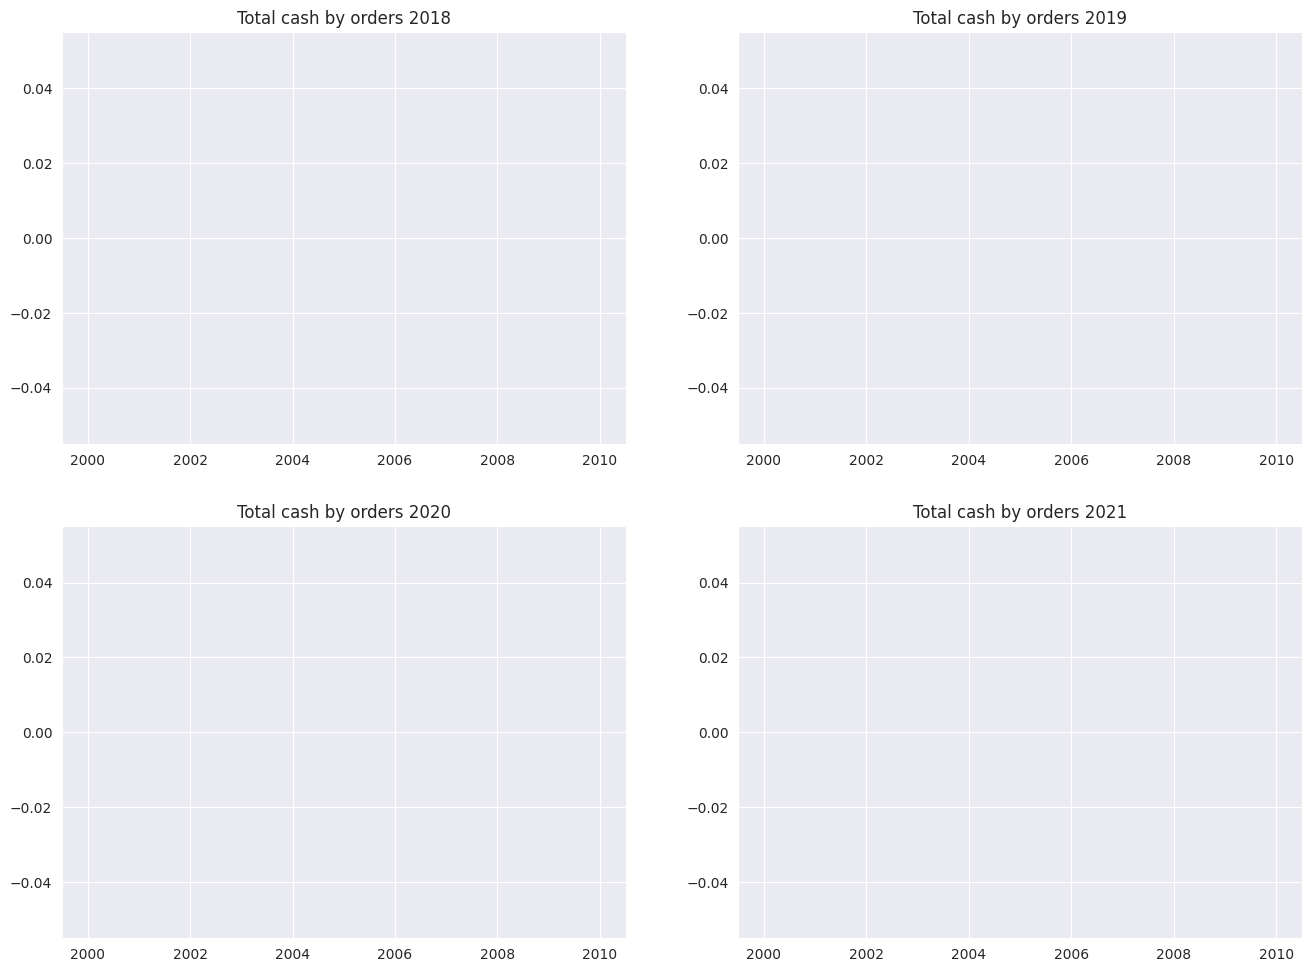

In [ ]:
plt.figure(figsize=(16,12))

#Plot 1
plt.subplot(2,2,1)
plt.plot(DateReference2018.index, DateReference2018.ShekelPrice)
plt.title('Total cash by orders 2018')

#Plot 2
plt.subplot(2,2,2)
plt.plot(DateReference2019.index, DateReference2019.ShekelPrice)
plt.title('Total cash by orders 2019')

#Plot 3
plt.subplot(2,2,3)
plt.plot(DateReference2020.index, DateReference2020.ShekelPrice)
plt.title('Total cash by orders 2020')

#Plot 4

plt.subplot(2,2,4)
plt.plot(DateReference2021.index, DateReference2021.ShekelPrice)
plt.title('Total cash by orders 2021')

In [ ]:
r = AllSales_df.groupby(by=['CustomerClassification','Refund']).sum()
r.reset_index(level=1,inplace=True)
r = r[['Refund','Amount']]
r=pd.pivot_table(data=r, index=r.index, columns=r.Refund)
r.columns = ['Buy', 'Refund']
r = r.drop('שונות')
r.fillna(value=0, inplace= True)
r = r.astype(int)
r.reset_index(inplace=True)
r

,CustomerClassification,Buy,Refund
0,אנרגיה,252,-8
1,אנרגיה מתחדשת,8,0
2,"בטון, גבס ודשנים",100,0
3,יצרן חומרי בניה,20,0
4,יצרן לתעשיית הרכב,232,0
5,יצרן לתעשית הרכב,4,0
6,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",459,-8
7,יצרן ציוד ומיכון,502,-15
8,"יצרן ציוד מדויק,אלקטרוניקה,רפואי",1002,-1
9,סוחר,36967,-339


In [ ]:
from scipy import stats

stats.ttest_ind(y.Year_2018, y.Year_2019)
# Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952038870015)
# stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.1767124074628319, pvalue=0.8641260599300513)

In [ ]:

from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#from scipy.stats import chi2_contingency

In [ ]:
top10Item = top
top10Item.reset_index(inplace=True)
top10Item['Top'] = 'Top10'
top10Item = top10Item[['ItemName','Top']]
top10Item
set(top10Item.ItemName)

{'טריגר ברבור',
 'ממיס ומנקה שומנים תעשייתיים',
 'ממיס ומסיר אבנית',
 'מסיר אבנית',
 'מסיר אבנית ללא הקצפה וריח',
 'מסיר אבנית למכונות קפה',
 'מסיר שומנים',
 'מסיר שומנים מרוכז',
 'נוזל לניקוי',
 'נוזל לניקוי וחיטוי משטחים'}

In [ ]:
df = AllSales_df[['CustomerClassification','ItemName',]]
df

,CustomerClassification,ItemName
0,יצרן ציוד ומיכון,אקונומיקה אקולוגית
1,יצרן ציוד ומיכון,ממיס ומנקה שומנים תעשייתיים
2,יצרן ציוד ומיכון,ממיס ומנקה שומנים תעשייתיים
3,יצרן ציוד ומיכון,מסיר אבנית ללא הקצפה וריח
4,יצרן ציוד ומיכון,מסיר אבנית ללא הקצפה וריח
...,...,...
4545,שונות,מסיר שומנים מרוכז
4546,שונות,נוזל לניקוי והסרת כתמים מבדים
4547,שירותים,פקדון
4548,שירותים,תרכיז ניקוי רב תכליתי


In [ ]:
df_Chi= pd.merge(left=df , right=top10Item , left_on='ItemName', right_on='ItemName', how='left' )
df_Chi.dropna(inplace=True)
df_Chi.drop(['Top'],axis=1,inplace=True)
#set(df_Chi.ItemDescription)
df_Chi.reset_index(inplace=True)

In [ ]:
# create sample data according to survey
#לקחתי את זה מהאתר - https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

In [ ]:
#להשוות בין הקטגוריה לבין המוצרים הנמכרים ביותר
df_crosstab = pd.crosstab(df_Chi['CustomerClassification'],
                            df_Chi['ItemName'],
                           margins=True, margins_name="Total")
df_crosstab 

ItemName,טריגר ברבור,ממיס ומנקה שומנים תעשייתיים,ממיס ומסיר אבנית,מסיר אבנית,מסיר אבנית ללא הקצפה וריח,מסיר אבנית למכונות קפה,מסיר שומנים,מסיר שומנים מרוכז,נוזל לניקוי,נוזל לניקוי וחיטוי משטחים,Total
CustomerClassification,,,,,,,,,,,
אנרגיה,0,7,3,1,0,0,0,8,3,1,23
אנרגיה מתחדשת,0,0,0,0,0,0,0,2,0,0,2
"בטון, גבס ודשנים",0,2,14,2,0,0,0,0,0,0,18
יצרן חומרי בניה,0,0,0,0,0,0,0,1,0,0,1
יצרן לתעשיית הרכב,0,16,0,0,0,0,0,0,0,0,16
"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",0,15,2,1,1,0,1,6,22,2,50
יצרן ציוד ומיכון,0,6,0,0,16,0,0,9,9,2,42
"יצרן ציוד מדויק,אלקטרוניקה,רפואי",0,27,2,0,8,0,7,24,22,1,91
סוחר,0,54,64,35,43,13,35,59,59,13,375


In [ ]:
alpha = 0.05

chi_square = 0
rows = df_Chi['CustomerClassification'].unique()
columns = df_Chi['ItemName'].unique()
for i in columns:
    for j in rows:
        O = df_crosstab[i][j]
        E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 694.9731028678527  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 694.9731028678527  and p value is: 192.70006615302756
Null Hypothesis is rejected.


In [ ]:
# אופציות לטי טסט
# - לפי תאריכים- תאריכי אספקה לבדוק על המוצרים לאורך השנה (גרף x y) - אולי לפי זה טי טסט

# - לעשות טי סטס עבור על כמה חברות מוציאות כל שנה (על כל הסכומים שכל חברה הוציאה לפי סיווגים)

## kmeans

In [ ]:

#https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=We%20define%20cost%20function%20of,decrease%20with%20number%20of%20iterations
#https://www.machinelearningplus.com/predictive-modeling/k-means-clustering/
#http://www.jtrive.com/clustering-in-python-with-k-means.html

In [ ]:
AllSales_df = AllSales_df.astype({'Company_Size':'int'})
AllSales_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 0 to 4549
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ItemCode                4550 non-null   object        
 1   DateReference           4550 non-null   datetime64[ns]
 2   CustomerName            4550 non-null   object        
 3   PostalCode              4550 non-null   float64       
 4   CustomerClassification  4550 non-null   object        
 5   ItemName                4550 non-null   object        
 6   ProductDescription      4550 non-null   object        
 7   Amount                  4550 non-null   int64         
 8   ShekelPrice             4550 non-null   float64       
 9   SupplyDate              4550 non-null   datetime64[ns]
 10  Year                    4550 non-null   int64         
 11  InIsrael                4550 non-null   int64         
 12  Refund                  4550 non-null   int64   

In [ ]:
#קלאסטרין KMENAS
Dumm = pd.get_dummies(AllSales_df.CustomerClassification)
Dumm.head(10)

,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",יצרן ציוד ומיכון,"יצרן ציוד מדויק,אלקטרוניקה,רפואי",סוחר,...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Dumm1 = pd.get_dummies(AllSales_df.ProductDescription)
Dumm1

,1000L,100KG,100ML,200L,250,250ML,25KG,25L,2L,500ML,...,Multi purpose,N,Poor salts,Spray,easy,ecological,perfumed,refreshing fragrance,spray,strong
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4546,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4547,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4548,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = AllSales_df[['InIsrael','Company_Size','PostalCode']]
x

,InIsrael,Company_Size,PostalCode
0,0,2,61180.0
1,0,2,61180.0
2,0,2,61180.0
3,0,2,61180.0
4,0,2,61180.0
...,...,...,...
4545,0,1,9706141.0
4546,0,1,9706141.0
4547,0,1,9706141.0
4548,0,1,9706141.0


In [ ]:
# allTogether = pd.concat([x,Dumm,Dumm1], axis=1)
# allTogether
allTogether = pd.concat([x,Dumm], axis=1)
allTogether

,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
0,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,0,1,9706141.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4546,0,1,9706141.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4547,0,1,9706141.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4548,0,1,9706141.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(allTogether)
scaled_df = pd.DataFrame(scaler.transform(allTogether), columns=allTogether.columns)
scaled_df.head()

,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
0,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
round(scaled_df.min(axis=0), 2)

InIsrael                                           0.0
Company_Size                                       0.0
PostalCode                                         0.0
אנרגיה                                             0.0
אנרגיה מתחדשת                                      0.0
בטון, גבס ודשנים                                   0.0
יצרן חומרי בניה                                    0.0
יצרן לתעשיית הרכב                                  0.0
יצרן לתעשית הרכב                                   0.0
יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים    0.0
יצרן ציוד ומיכון                                   0.0
יצרן ציוד מדויק,אלקטרוניקה,רפואי                   0.0
סוחר                                               0.0
ספק לתעשיית הרכב                                   0.0
עיבוד מתכת                                         0.0
שונות                                              0.0
שירותים                                            0.0
תעשיה ימית                                         0.0
תעשיה כימי

In [ ]:
round(scaled_df.max(axis=0), 1)

InIsrael                                           1.0
Company_Size                                       1.0
PostalCode                                         1.0
אנרגיה                                             1.0
אנרגיה מתחדשת                                      1.0
בטון, גבס ודשנים                                   1.0
יצרן חומרי בניה                                    1.0
יצרן לתעשיית הרכב                                  1.0
יצרן לתעשית הרכב                                   1.0
יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים    1.0
יצרן ציוד ומיכון                                   1.0
יצרן ציוד מדויק,אלקטרוניקה,רפואי                   1.0
סוחר                                               1.0
ספק לתעשיית הרכב                                   1.0
עיבוד מתכת                                         1.0
שונות                                              1.0
שירותים                                            1.0
תעשיה ימית                                         1.0
תעשיה כימי

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1234)

In [ ]:
kmeans.fit_predict(scaled_df)

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [ ]:
labels = kmeans.labels_
labels

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [ ]:
allTogether['cluster'] = labels
allTogether


,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה",cluster
0,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,2,61180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,0,1,9706141.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4546,0,1,9706141.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4547,0,1,9706141.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4548,0,1,9706141.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
allTogether['cluster'].value_counts()

2    1136
4     977
1     887
3     858
0     692
Name: cluster, dtype: int64

In [ ]:
kmeans.cluster_centers_

array([[ 9.97109827e-02,  4.25578035e-01,  7.38906854e-01,
        -4.85722573e-17, -5.42101086e-19, -2.25514052e-17,
        -2.60208521e-18, -4.33680869e-18, -2.71050543e-19,
        -1.04083409e-16,  7.28583860e-17,  1.24900090e-16,
         2.77555756e-16, -1.35525272e-19, -4.85722573e-17,
         1.38777878e-15,  1.52655666e-15,  2.77555756e-17,
         1.38777878e-16, -1.35525272e-19, -1.56125113e-16,
         5.96311195e-18, -4.33680869e-18,  1.00000000e+00],
       [ 1.27395716e-01,  4.47576099e-01,  7.23624932e-01,
        -6.93889390e-17, -4.66206934e-18, -5.03069808e-17,
         1.99493200e-17, -3.72965547e-17, -2.33103467e-18,
        -1.42247325e-16, -5.55111512e-17,  1.17961196e-16,
         1.66533454e-15, -1.16551734e-18, -6.93889390e-17,
         2.52575738e-15,  1.00000000e+00,  4.51028104e-17,
         1.45716772e-16, -1.16551734e-18, -2.08166817e-17,
         7.48099499e-18, -3.72965547e-17, -3.05311332e-16],
       [ 7.39436620e-02,  2.04665493e-01,  9.51600565e

In [ ]:
scaled_df['cluster'] = labels
cluster_means = scaled_df.groupby('cluster').mean() 
cluster_means
#מראה את הממוצע של הסטרודאים למיקום שלהם בגרף
#זזה והקוד לפני מראה שיצא לנו נכון גם בדאטה המקורי שלנו

,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.099711,0.425578,0.738907,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.127396,0.447576,0.723625,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.073944,0.204665,0.951601,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.041958,0.736014,0.515788,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.031730,0.405322,0.739257,0.053224,0.004094,0.037871,0.01433,0.032753,0.002047,0.111566,...,0.053224,0.0,0.0,0.019447,0.214944,0.001024,0.118731,0.003071,0.032753,0.0


In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers

array([[ 9.97109827e-02,  1.85115607e+00,  7.17274924e+06,
        -4.85722573e-17, -5.42101086e-19, -2.25514052e-17,
        -2.60208521e-18, -4.33680869e-18, -2.71050543e-19,
        -1.04083409e-16,  7.28583860e-17,  1.24900090e-16,
         2.77555756e-16, -1.35525272e-19, -4.85722573e-17,
         1.38777878e-15,  1.52655666e-15,  2.77555756e-17,
         1.38777878e-16, -1.35525272e-19, -1.56125113e-16,
         5.96311195e-18, -4.33680869e-18,  1.00000000e+00],
       [ 1.27395716e-01,  1.89515220e+00,  7.02446846e+06,
        -6.93889390e-17, -4.66206934e-18, -5.03069808e-17,
         1.99493200e-17, -3.72965547e-17, -2.33103467e-18,
        -1.42247325e-16, -5.55111512e-17,  1.17961196e-16,
         1.66533454e-15, -1.16551734e-18, -6.93889390e-17,
         2.52575738e-15,  1.00000000e+00,  4.51028104e-17,
         1.45716772e-16, -1.16551734e-18, -2.08166817e-17,
         7.48099499e-18, -3.72965547e-17, -3.05311332e-16],
       [ 7.39436620e-02,  1.40933099e+00,  9.23652036e

## סלי מוצרים

In [ ]:
item = AllSales_df['ItemName']
a = pd.merge(left=allTogether , right=item , left_on=allTogether.index, right_on=item.index, how='inner' )
FirstGruop = a.loc[a['cluster'] == 0]
SecGruop = a.loc[a['cluster'] == 1]
ThirdGruop = a.loc[a['cluster'] == 2]
FouthGruop = a.loc[a['cluster'] == 3]
FiftGruop = a.loc[a['cluster'] == 4]

In [ ]:
Basket1 = FirstGruop.groupby('ItemName').count()
Basket1 = Basket1.sort_values(by=['cluster'],ascending=False).head(10)
Basket1 = Basket1.reset_index()
Basket1 = Basket1[['ItemName']]

Basket2 = SecGruop.groupby('ItemName').count()
Basket2 = Basket2.sort_values(by=['cluster'],ascending=False).head(10)
Basket2 = Basket2.reset_index()
Basket2 = Basket2[['ItemName']]

Basket3 = ThirdGruop.groupby('ItemName').count()
Basket3 = Basket3.sort_values(by=['cluster'],ascending=False).head(10)
Basket3 = Basket3.reset_index()
Basket3 = Basket3[['ItemName']]

Basket4 = FouthGruop.groupby('ItemName').count()
Basket4 = Basket4.sort_values(by=['cluster'],ascending=False).head(10)
Basket4 = Basket4.reset_index()
Basket4 = Basket4[['ItemName']]

Basket5 = FiftGruop.groupby('ItemName').count()
Basket5 = Basket5.sort_values(by=['cluster'],ascending=False).head(10)
Basket5 = Basket5.reset_index()
Basket5 = Basket5[['ItemName']]

In [ ]:
Basket1

,ItemName
0,מסיר שומנים מרוכז
1,פקדון
2,ממיס ומנקה שומנים תעשייתיים
3,מסיר אבנית ללא הקצפה וריח
4,נוזל לניקוי
5,ממיס ומסיר דבק
6,מסיר מדבקות
7,מסיר שומנים
8,מסיר חלודה
9,ממיס ומסיר אבנית


In [ ]:
Basket4

,ItemName
0,פקדון
1,ממיס ומסיר אבנית
2,מסיר שומנים מרוכז
3,נוזל לניקוי
4,ממיס ומנקה שומנים תעשייתיים
5,מסיר חלודה
6,נוזל כלים
7,מסיר אבנית ללא הקצפה וריח
8,מסיר שומנים
9,מסיר אבנית


In [ ]:
print(Basket1)
print(Basket2)
print(Basket3)
print(Basket4)
print(Basket5)

                      ItemName
0            מסיר שומנים מרוכז
1                        פקדון
2  ממיס ומנקה שומנים תעשייתיים
3    מסיר אבנית ללא הקצפה וריח
4                  נוזל לניקוי
5               ממיס ומסיר דבק
6                  מסיר מדבקות
7                  מסיר שומנים
8                   מסיר חלודה
9             ממיס ומסיר אבנית
                      ItemName
0  ממיס ומנקה שומנים תעשייתיים
1            מסיר שומנים מרוכז
2             ממיס ומסיר אבנית
3                        פקדון
4    מסיר אבנית ללא הקצפה וריח
5             מסיר אבנית מרוכז
6           מסיר אבנית תעשייתי
7                   מסיר חלודה
8                  נוזל לניקוי
9    נוזל לניקוי וחיטוי משטחים
                        ItemName
0              מסיר שומנים מרוכז
1                     מסיר חלודה
2    ממיס ומנקה שומנים תעשייתיים
3                      נוזל כלים
4                          פקדון
5               נוזל כביסה מרוכז
6                     נוזל ניקוי
7                     מארז חסכון
8            מארז לשי

In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=allTogether.InIsrael, y=allTogether.Company_Size, mode='markers',  marker_color=allTogether.cluster))
# fig.add_trace(go.Scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], mode='markers',  marker_color='magenta', marker_size=10))
# fig.update_layout(
#     title="Murder by Assault",
#     xaxis_title="Assault",
#     yaxis_title="Murder",

#     font=dict(
#         family="Courier New, monospace",
#         size=14,
#         color="RebeccaPurple"
#     ),
#     width=800
# )

# fig.show()

In [ ]:
sse = []
k_rng = [i for i in range(1,50)]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    sse.append(km.inertia_)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=k_rng, y=sse, mode='markers+lines'))
fig.update_layout(
    title="Inertia by K",
    xaxis_title="K",
    yaxis_title="Inertia",

    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    width=800
)

#צריך את הזווית הכי חדה
fig.show()

In [ ]:
scaled_df = scaled_df.drop('cluster',axis = 1)
scaled_df

,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
0,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.005983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4546,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4547,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4548,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


סט מבחן סט אימון

In [ ]:
from sklearn.model_selection import train_test_split
old, new = train_test_split(scaled_df, test_size=0.2, random_state=1234)

In [ ]:
round(old.min(axis=0), 2)
round(old.max(axis=0), 1)

InIsrael                                           1.0
Company_Size                                       1.0
PostalCode                                         1.0
אנרגיה                                             1.0
אנרגיה מתחדשת                                      1.0
בטון, גבס ודשנים                                   1.0
יצרן חומרי בניה                                    1.0
יצרן לתעשיית הרכב                                  1.0
יצרן לתעשית הרכב                                   1.0
יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים    1.0
יצרן ציוד ומיכון                                   1.0
יצרן ציוד מדויק,אלקטרוניקה,רפואי                   1.0
סוחר                                               1.0
ספק לתעשיית הרכב                                   0.0
עיבוד מתכת                                         1.0
שונות                                              1.0
שירותים                                            1.0
תעשיה ימית                                         1.0
תעשיה כימי

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit_predict(old)
labels = kmeans.labels_
labels
old['cluster'] = labels
old
old['cluster'].value_counts()

1    889
2    786
0    726
3    679
4    560
Name: cluster, dtype: int64

In [ ]:
kmeans.cluster_centers_
old['cluster'] = labels
cluster_means = old.groupby('cluster').mean() 
cluster_means

,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.140496,0.442837,0.727990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.080990,0.203037,0.952833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.034351,0.410941,0.731330,0.057252,0.005089,0.041985,0.015267,0.033079,0.002545,0.117048,...,0.047074,0.0,0.0,0.019084,0.217557,0.0,0.125954,0.001272,0.030534,0.0
3,0.041237,0.729013,0.515981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.098214,0.433036,0.736738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers

array([[ 1.40495868e-01,  1.88567493e+00,  7.06682133e+06,
        -1.90819582e-17,  3.03576608e-18,  2.60208521e-17,
         9.97465999e-18,  2.16840434e-17,  1.51788304e-18,
         7.63278329e-17,  6.93889390e-17,  1.73472348e-16,
         1.66533454e-16,  0.00000000e+00,  1.73472348e-17,
         1.02695630e-15,  1.00000000e+00,  1.12757026e-17,
        -6.93889390e-18,  0.00000000e+00, -1.76941795e-16,
         7.58941521e-19,  1.99493200e-17,  4.44089210e-16],
       [ 8.09898763e-02,  1.40607424e+00,  9.24847661e+06,
        -8.32667268e-17,  3.03576608e-18,  8.67361738e-18,
         9.97465999e-18,  2.16840434e-17,  1.51788304e-18,
         7.63278329e-17,  6.59194921e-17,  1.24900090e-16,
         1.94289029e-16,  0.00000000e+00, -2.25514052e-17,
         1.00000000e+00,  2.08166817e-15,  1.12757026e-17,
         2.01227923e-16,  0.00000000e+00, -2.08166817e-16,
         7.58941521e-19,  1.99493200e-17,  0.00000000e+00],
       [ 3.43511450e-02,  1.82188295e+00,  7.09923471e

In [ ]:
item = AllSales_df['ItemName']
a = pd.merge(left=old , right=item , left_on=old.index, right_on=item.index, how='inner' )
FirstGruop = a.loc[a['cluster'] == 0]
SecGruop = a.loc[a['cluster'] == 1]
ThirdGruop = a.loc[a['cluster'] == 2]
FouthGruop = a.loc[a['cluster'] == 3]
FiftGruop = a.loc[a['cluster'] == 4]

Basket1 = FirstGruop.groupby('ItemName').count()
Basket1 = Basket1.sort_values(by=['cluster'],ascending=False).head(10)
Basket1 = Basket1.reset_index()
Basket1 = Basket1[['ItemName']]

Basket2 = SecGruop.groupby('ItemName').count()
Basket2 = Basket2.sort_values(by=['cluster'],ascending=False).head(10)
Basket2 = Basket2.reset_index()
Basket2 = Basket2[['ItemName']]

Basket3 = ThirdGruop.groupby('ItemName').count()
Basket3 = Basket3.sort_values(by=['cluster'],ascending=False).head(10)
Basket3 = Basket3.reset_index()
Basket3 = Basket3[['ItemName']]

Basket4 = FouthGruop.groupby('ItemName').count()
Basket4 = Basket4.sort_values(by=['cluster'],ascending=False).head(10)
Basket4 = Basket4.reset_index()
Basket4 = Basket4[['ItemName']]

Basket5 = FiftGruop.groupby('ItemName').count()
Basket5 = Basket5.sort_values(by=['cluster'],ascending=False).head(10)
Basket5 = Basket5.reset_index()
Basket5 = Basket5[['ItemName']]


In [ ]:
# sse = []
# k_rng = [i for i in range(1,50)]
# for k in k_rng:
#     km = KMeans(n_clusters=k)
#     km.fit(old)
#     sse.append(km.inertia_)

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=k_rng, y=sse, mode='markers+lines'))
# fig.update_layout(
#     title="Inertia by K",
#     xaxis_title="K",
#     yaxis_title="Inertia",

#     font=dict(
#         family="Courier New, monospace",
#         size=14,
#         color="RebeccaPurple"
#     ),
#     width=800
# )

# #צריך את הזווית הכי חדה
# fig.show()


In [ ]:
# np.savetxt('NewCustemer.csv', cluster_means, delimiter=',', fmt='%s')


In [ ]:
# cluster_means.to_csv(r'‏‏C:\Users\Or\Desktop\רוני לימודים\lala.csv', index = False)


In [ ]:
# from google.colab import drive
# drive.mount('drive')

In [ ]:
# cluster_means.to_csv('data.csv')
# !cp data.csv "drive/My Drive/"

In [ ]:
# new.to_csv('data.csv')
# !cp data.csv "drive/My Drive/"

In [ ]:
new

,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
1070,0.0,1.0,0.004094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627,0.0,1.0,0.753670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3115,0.0,0.0,0.437236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2271,0.0,0.5,0.471748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
369,0.0,1.0,0.850785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4257,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3961,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4188,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cluster_means 


,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,"יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים",...,עיבוד מתכת,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה"
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.140496,0.442837,0.727990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.080990,0.203037,0.952833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.034351,0.410941,0.731330,0.057252,0.005089,0.041985,0.015267,0.033079,0.002545,0.117048,...,0.047074,0.0,0.0,0.019084,0.217557,0.0,0.125954,0.001272,0.030534,0.0
3,0.041237,0.729013,0.515981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.098214,0.433036,0.736738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# def fitCluster(allCluster,new):
#   global c 
#   MERHAK = 100
#   for i in range(allCluster.shape[0]):
#     point1 = allCluster.iloc[i]
#     point2 = new
#     dist = np.linalg.norm(point1 - point2)
#     if dist <= MERHAK:
#       MERHAK = dist
#       c = i   
#   return c

# fitCluster(cluster_means,new.iloc[0])

In [ ]:
cluster_means.iloc[1]

InIsrael                                           0.080990
Company_Size                                       0.203037
PostalCode                                         0.952833
אנרגיה                                             0.000000
אנרגיה מתחדשת                                      0.000000
בטון, גבס ודשנים                                   0.000000
יצרן חומרי בניה                                    0.000000
יצרן לתעשיית הרכב                                  0.000000
יצרן לתעשית הרכב                                   0.000000
יצרן מע' הידראוליות ופניאומטיות, שסתומים ואטמים    0.000000
יצרן ציוד ומיכון                                   0.000000
יצרן ציוד מדויק,אלקטרוניקה,רפואי                   0.000000
סוחר                                               0.000000
ספק לתעשיית הרכב                                   0.000000
עיבוד מתכת                                         0.000000
שונות                                              1.000000
שירותים                                 

In [ ]:
point1 = cluster_means.iloc[1]
point2 = new.iloc[1]
dist = np.linalg.norm(point1 - point2)
dist


1.637490413824652

In [ ]:
# def newCos(newtumer,cluster_means):
#   newtumer['cluster'] ='nan'
#   for i in range(len(newtumer)):
#     costumer = newtumer.iloc[i]
#     x = fitCluster(cluster_means, costumer)
#     newtumer['cluster'].iloc[i] = x
#   return newtumer   



In [ ]:
def f(newtumer,cluster_means):
  global h
  clu = []
  for i in range(len(newtumer)):
    costumer = newtumer.iloc[i]
    MERHAK = 100
    for j in range(cluster_means.shape[0]):
      point1 = cluster_means.iloc[j]
      point2 = costumer
      dist = np.linalg.norm(point1 - point2)
      if dist < MERHAK:
        MERHAK = dist
        h = j
    clu.append(h)    
  return clu

In [ ]:
clusterN = pd.DataFrame(f(new,cluster_means), columns = ['cluster'])
clusterN

,cluster
0,0
1,3
2,1
3,2
4,2
...,...
905,1
906,1
907,0
908,1


In [ ]:
from cycler import concat
new = new.reset_index()
NewCustemer = pd.concat([new,clusterN],axis=1)
NewCustemer.rename({'index':'Cnum',0:'cluster'},axis= 1, inplace=True)
NewCustemer

,Cnum,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,יצרן לתעשית הרכב,...,שונות,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה",cluster
0,1070,0.0,1.0,0.004094,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1627,0.0,1.0,0.753670,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3115,0.0,0.0,0.437236,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2271,0.0,0.5,0.471748,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,369,0.0,1.0,0.850785,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,4051,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
906,4257,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
907,3961,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
908,4188,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
NewCustemer.cluster.value_counts()

1    247
2    191
3    179
0    161
4    132
Name: cluster, dtype: int64

##chaking

##בדיקה של סל מוצרים לפי קלאסטר חדש / ישן


In [ ]:
i = AllSales_df[['CustomerName','ItemName']]
N = pd.merge(left=NewCustemer , right=i , left_on=NewCustemer.Cnum, right_on=i.index, how='inner' )

FirstGruop = a.loc[a['cluster'] == 0]
SecGruop = a.loc[a['cluster'] == 1]
ThirdGruop = a.loc[a['cluster'] == 2]
FouthGruop = a.loc[a['cluster'] == 3]
FiftGruop = a.loc[a['cluster'] == 4]

Basket1_N = FirstGruop.groupby('ItemName').count()
Basket1_N = Basket1_N.sort_values(by=['cluster'],ascending=False).head(10)
Basket1_N = Basket1_N.reset_index()
Basket1_N = Basket1_N[['ItemName']]

Basket2_N = SecGruop.groupby('ItemName').count()
Basket2_N = Basket2_N.sort_values(by=['cluster'],ascending=False).head(10)
Basket2_N = Basket2_N.reset_index()
Basket2_N = Basket2_N[['ItemName']]

Basket3_N = ThirdGruop.groupby('ItemName').count()
Basket3_N = Basket3_N.sort_values(by=['cluster'],ascending=False).head(10)
Basket3_N = Basket3_N.reset_index()
Basket3_N = Basket3_N[['ItemName']]

Basket4_N = FouthGruop.groupby('ItemName').count()
Basket4_N = Basket4_N.sort_values(by=['cluster'],ascending=False).head(10)
Basket4_N = Basket4_N.reset_index()
Basket4_N = Basket4_N[['ItemName']]

Basket5_N = FiftGruop.groupby('ItemName').count()
Basket5_N = Basket5_N.sort_values(by=['cluster'],ascending=False).head(10)
Basket5_N = Basket5_N.reset_index()
Basket5_N = Basket5_N[['ItemName']]

##בדיקה לפי קניות לקוח וסל המוצא לו 

In [ ]:
cus = N.groupby(by = ['CustomerName']).count()

y = 'מי עדן בע"מ'
cus.sort_values(by=['cluster'],ascending=False).head(10)

,key_0,Cnum,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,...,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה",cluster,ItemName
CustomerName,,,,,,,,,,,,,,,,,,,,,
"זהר צח 2009 אילת בע""מ",40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
עוצמה שיווק מוצרי צריכה ב,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
גרין איט,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
"א.תבור סחר בע""מ",15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
ניו לינאו סינמה (2006) בע,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
"יפת אביזרי גז בע""מ",11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
אלה רוזנוב,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
אבן אודם,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
קלין מאסטר,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [ ]:
v = N[(N['CustomerName'] == y)]
v.cluster.value_counts()

4    6
Name: cluster, dtype: int64

In [ ]:
Basket4
#הסל המקורי מה80 אחוז

,ItemName
0,פקדון
1,נוזל לניקוי
2,ממיס ומסיר אבנית
3,ממיס ומנקה שומנים תעשייתיים
4,מסיר שומנים מרוכז
5,מסיר חלודה
6,מסיר אבנית ללא הקצפה וריח
7,נוזל כלים
8,מסיר אבנית
9,מסיר שומנים


In [ ]:
v = AllSales_df[(AllSales_df['CustomerName'] == y)]
v_Orginal = v.groupby('ItemName').count()
v_Orginal = v_Orginal.sort_values(by=['ItemCode'],ascending=False).head(10)
v_Orginal = v_Orginal.reset_index()
v_Orginal = v_Orginal[['ItemName']]
v_Orginal
#עשרת המוצרים האמיתים שהלוקוח קנה 

,ItemName
0,מסיר מדבקות
1,מסיר אבנית ללא הקצפה וריח
2,נוזל לניקוי והברקה
3,מסיר אבנית ממחליפי חום
4,מסיר שומנים מרוכז
5,פקדון
6,מסיר אבנית למכונות קפה
7,נוזל לניקוי והברקת משטחים
8,ממיס ומנקה שומנים תעשייתיים
9,ממיס ומסיר דבק


In [ ]:
# point1 = cluster_means.iloc[0]
# point2 = new.iloc[0]
# temp = point1 - point2

# dist = np.sqrt(np.dot(temp.T, temp))
# dist

In [ ]:
# new.iloc[0]

In [ ]:
# new['cluster'] ='nan'
# for i in new:
#   costumer = new.iloc[0]
#   cluster = fitCluster(cluster_means, costumer)
#   new['cluster'].iloc[i] = cluster

In [ ]:
# new['cluster'] = 'nan'
# new['cluster'].iloc[0] =1
# new

In [ ]:
# point1 = cluster_means.iloc[4]
# point2 = new.iloc[0]

# dist = np.linalg.norm(point1 - point2)
# dist

In [ ]:
# temp = point1 - point2

# dist = np.sqrt(np.dot(temp.T, temp))
 
# # printing Euclidean distance
# print(dist)

In [ ]:
# sum_vectors = np.sum(np.square(point1 - point2))
 
# # perform the squareroot and
# # print Euclidean distance
# print(np.sqrt(sum_vectors))

In [ ]:
# # from scipy.spatial import distance
# # print(distance.euclidean(point1,point2))
import pdb

In [ ]:
i = AllSales_df[['CustomerName']]
N = pd.merge(left=NewCustemer , right=i , left_on=NewCustemer.Cnum, right_on=i.index, how='inner' )
N.drop('key_0',axis=1,inplace=True)
N.shape

(910, 27)

In [ ]:
def custmerTOP10(AllSales_df,c):
  y = AllSales_df.CustomerName.loc[c]
  v = AllSales_df[(AllSales_df['CustomerName'] == y)]
  v_Orginal = v.groupby('ItemName').count()
  v_Orginal = v_Orginal.sort_values(by=['ItemCode'],ascending=False).head(10)
  v_Orginal = v_Orginal.reset_index()
  v_Orginal = v_Orginal[['ItemName']]
  return v_Orginal
  


In [ ]:
N.iloc[0,26]
N.CustomerName[0]

'ווילד  פאט'

In [ ]:
def bdika(NewCustemer,AllSales_df,basket,num):
  # pdb.set_trace()
  count = 0
  lekalek = 0
  nameC = [] 
  for i in range(len(NewCustemer)):
    if NewCustemer.iloc[i,25] == num:
    # if NewCustemer.iloc[i,57] == num:  
      c = NewCustemer.iloc[i,0]
      name = NewCustemer.CustomerName[i]
      exists = name in nameC
      if exists == False:
        nameC.append(name)
        cusItems = custmerTOP10(AllSales_df,c)
        lekalek = lekalek + len(cusItems)
        for j in range(len(basket)):
          for k in range(len(cusItems)):
            if basket.ItemName[j] == cusItems.ItemName[k]:
              count = count +1     
  s = float(count/(lekalek))
  return s

In [ ]:
def NumCusINclas(NewCustemer,AllSales_df,basket,num):
  # pdb.set_trace()
  count = 0
  lekalek = 0
  nameC = [] 
  for i in range(len(NewCustemer)):
    if NewCustemer.iloc[i,25] == num:
    # if NewCustemer.iloc[i,57] == num:  
      c = NewCustemer.iloc[i,0]
      name = NewCustemer.CustomerName[i]
      exists = name in nameC
      if exists == False:
        nameC.append(name)
        cusItems = custmerTOP10(AllSales_df,c)
        lekalek = lekalek + len(cusItems)
        for j in range(len(basket)):
          for k in range(len(cusItems)):
            if basket.ItemName[j] == cusItems.ItemName[k]:
              count = count +1     
  s = float(count/(lekalek))
  return nameC

In [ ]:
N.iloc[0,25]

0

In [ ]:
pB3 =round(bdika(N,AllSales_df,Basket3,2)*100,2)
pB3

67.35

In [ ]:
pB1 =round(bdika(N,AllSales_df,Basket1,0)*100,2)
N1 = NumCusINclas(N,AllSales_df,Basket1,0)
pB2 =round(bdika(N,AllSales_df,Basket2,1)*100,2)
N2 = NumCusINclas(N,AllSales_df,Basket2,1)
pB3 =round(bdika(N,AllSales_df,Basket3,2)*100,2)
N3 = NumCusINclas(N,AllSales_df,Basket3,2)
pB4 =round(bdika(N,AllSales_df,Basket4,3)*100,2)
N4 = NumCusINclas(N,AllSales_df,Basket4,3)
pB5 =round(bdika(N,AllSales_df,Basket5,4)*100,2)
N5 =NumCusINclas(N,AllSales_df,Basket5,4)

In [ ]:
print(str(pB1) + '%')
print(str(pB2) + '%')
print(str(pB3) + '%')
print(str(pB4) + '%')
print(str(pB5) + '%')

55.68%
44.13%
67.35%
53.48%
64.16%


In [ ]:
N1 = len(N1)
N2 = len(N2)
N3 = len(N3)
N4 = len(N4)
N5 = len(N5)

In [ ]:
Mone = pB1*N1 + pB2*N2 + pB3*N3 + pB4*N4 + pB5*N5
Mechne = N1+N2+N3+N4+N5

In [ ]:
MeMoza = round(Mone/Mechne,2)
print(str(MeMoza) + '%')

55.63%


In [ ]:
Basket1.loc[0,'ItemName']

'ממיס ומנקה שומנים תעשייתיים'

In [ ]:
NewCustemer['cluster'][0]

0

In [ ]:
i = AllSales_df[['CustomerName']]
N = pd.merge(left=NewCustemer , right=i , left_on=NewCustemer.Cnum, right_on=i.index, how='inner' )
N

,key_0,Cnum,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,...,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה",cluster,CustomerName
0,1070,1070,0.0,1.0,0.004094,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,ווילד פאט
1,1627,1627,0.0,1.0,0.753670,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,א.מרידל שיווק ואספקה 2011
2,3115,3115,0.0,0.0,0.437236,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,ועד בית בני בנימין 33 נתניה
3,2271,2271,0.0,0.5,0.471748,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,"גרפופרינט בע""מ"
4,369,369,0.0,1.0,0.850785,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,דלתא טכנולוגיות
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,4051,4051,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,"יורוספורט בע""מ"
906,4257,4257,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,חיים קרן
907,3961,3961,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"יאמניר בע""מ"
908,4188,4188,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,ראובן בינימין


In [ ]:
Nc = N.loc[N['cluster'] == 2]
Nc

,key_0,Cnum,InIsrael,Company_Size,PostalCode,אנרגיה,אנרגיה מתחדשת,"בטון, גבס ודשנים",יצרן חומרי בניה,יצרן לתעשיית הרכב,...,שירותים,תעשיה ימית,תעשיה כימית,תעשיית הטקסטיל,תעשיית הנייר וההדפסה,תעשיית העץ,תעשיית הרכבת והאוויר,"תעשית המזון, הפארמה והקוסמטיקה",cluster,CustomerName
3,2271,2271,0.0,0.5,0.471748,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,"גרפופרינט בע""מ"
4,369,369,0.0,1.0,0.850785,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,דלתא טכנולוגיות
33,1763,1763,0.0,1.0,0.699379,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,"נטפים-מחסן טכני נטפים בע"""
34,2008,2008,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,קרמה פלוס סוכנויות קפה בע
44,2296,2296,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,"שוהם מכונות ומבלטים בע""מ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1591,1591,0.0,0.5,0.006186,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,נשר מפעלי מלט ישראליים בע
886,4026,4026,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,"סי.איי.סיסטמס-ישראל בע""מ"
889,3895,3895,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,פנטוגראפ המאירי
896,1271,1271,0.0,0.5,0.798606,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,"אדמה אגן בע""מ"


In [ ]:
def newMeanns(NewCustemer,AllSales_df,basket,num):
  nameC = [] 
  newMeans =[]
  for i in range(len(NewCustemer)):
    count = 0
    if NewCustemer.iloc[i,25] == num:
       c = NewCustemer.iloc[i,0]
       name = NewCustemer.CustomerName[i]
       exists = name in nameC
       if exists == False:
         nameC.append(name)
         cusItems = custmerTOP10(AllSales_df,c)
         lekalek = len(cusItems)
         for j in range(len(basket)):
           for k in range(len(cusItems)):
             if basket.ItemName[j] == cusItems.ItemName[k]:
               count = count +1
         s = float(count/(lekalek))
         newMeans.append(s)      
  return newMeans 






In [ ]:
C1 = newMeanns(N,AllSales_df,Basket1,0)
C2 = newMeanns(N,AllSales_df,Basket2,1)
C3 = newMeanns(N,AllSales_df,Basket3,2)
C4 = newMeanns(N,AllSales_df,Basket4,3)
C5 = newMeanns(N,AllSales_df,Basket5,4)



In [ ]:
con = np.concatenate((C1,C2,C3,C4,C5))

In [ ]:


print('Mean: ' + str(round(con.mean(),4)*100) + '%')
print('Std: ' + str(round(con.std(),4)*100) + '%')

Mean: 54.2%
Std: 39.68%


In [ ]:
len(set(N.CustomerName))

428

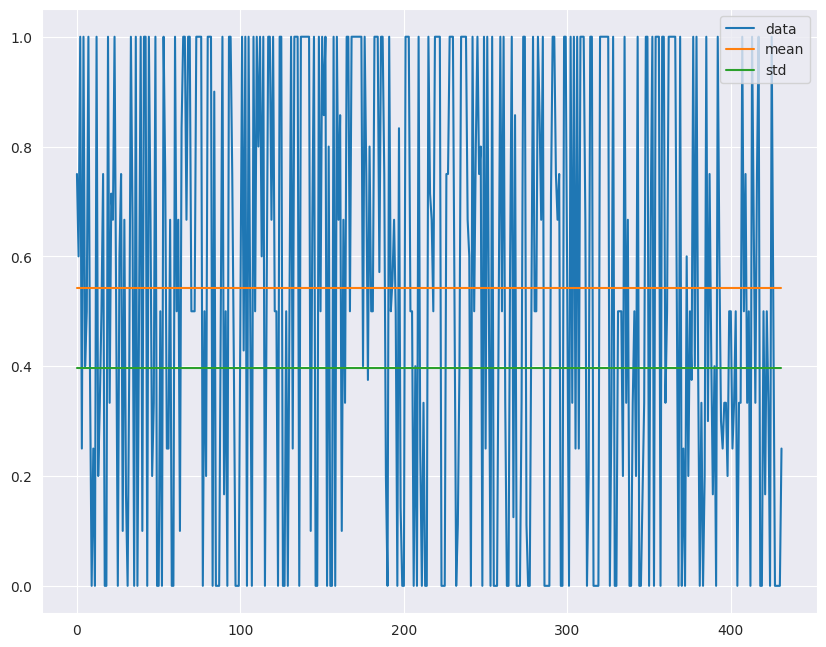

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

x = con.mean()
y = con.std()
df = pd.DataFrame({
      'data': con,
      'mean': [x for i in range(len(con))],
      'std': [y for i in range(len(con))]})

df.plot()
plt.rcParams.update({'figure.figsize':(250,250), 'figure.dpi':100})
plt.show()

In [ ]:
sns.displot(con, fill=True)

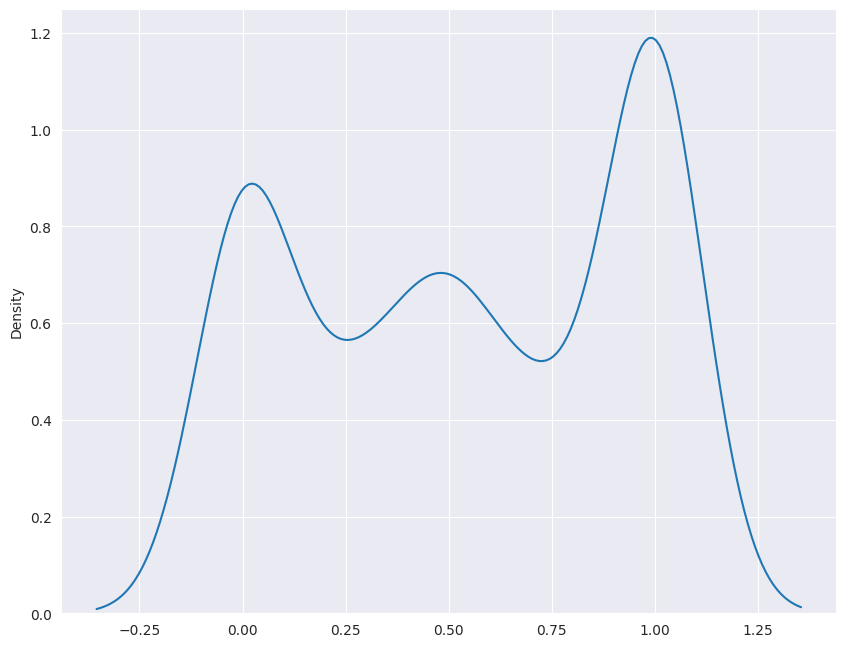

In [ ]:
sns.kdeplot(con)

In [ ]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(con)

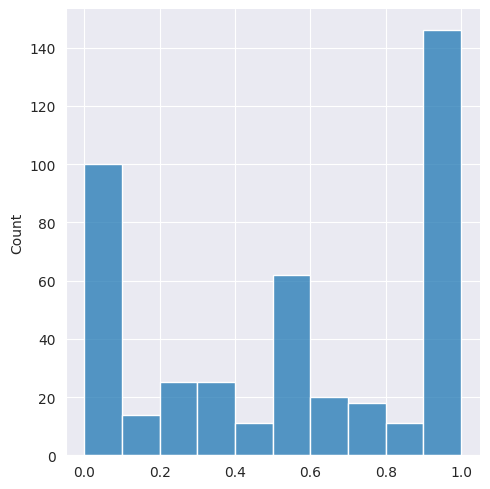

In [ ]:
sns.displot(con)

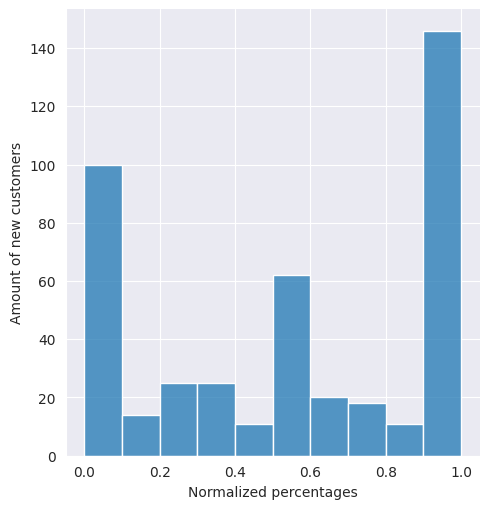

In [ ]:
p = sns.displot(data = con)
p.set( xlabel = "Normalized percentages", ylabel = "Amount of new customers")

In [ ]:
sns.displot(con, x="count", kind="kde", cut=0)